In [4]:
import math
import random
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

def inside_circle(x, y, r):
   return x*x + y*y <= r*r

def generate_points(x, y, r, n, c):
    points = []
    for _ in range(n):
        theta = random.uniform(0, 2*math.pi)
        radius = random.uniform(0, r)
        new_x = x + radius * math.cos(theta)
        new_y = y + radius * math.sin(theta)
        points.append((new_x, new_y, c))
    return points

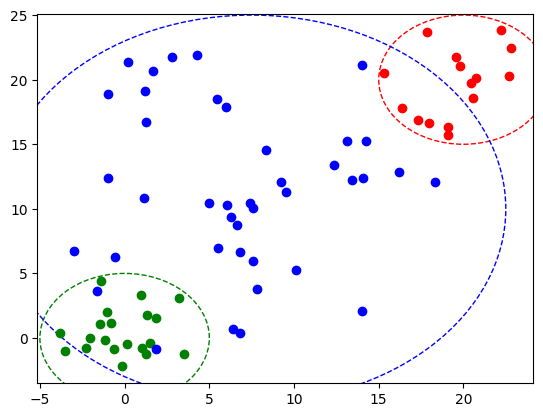

In [5]:
#Generating 3 sets of points
points_list = []
   
#Set 1 
points_list.extend(generate_points(0, 0, 5, 20, 0))
   
#Set 2
points_list.extend(generate_points(20, 20, 5, 15, 1))
   
#Set 3
points_list.extend(generate_points(7.5, 10, 15, 40, 2))
   
# Plotting circles and points
fig, ax = plt.subplots()
colors = {0: 'g', 1: 'r', 2: 'b'} 
   
#Plotting circles
circle1 = plt.Circle((0, 0), 5, color='g', fill=False, ls='--')
ax.add_artist(circle1)
   
circle2 = plt.Circle((20, 20), 5, color='r', fill=False, ls='--')
ax.add_artist(circle2)
   
circle3 = plt.Circle((7.5, 10), 15, color='b', fill=False, ls='--')
ax.add_artist(circle3)  
   
#Plotting points for each class
for point in points_list:      
   ax.scatter(point[0], point[1], c=colors[point[2]], marker='o')
   
plt.show()

Best K: 9, Best Accuracy: 0.9333333333333333


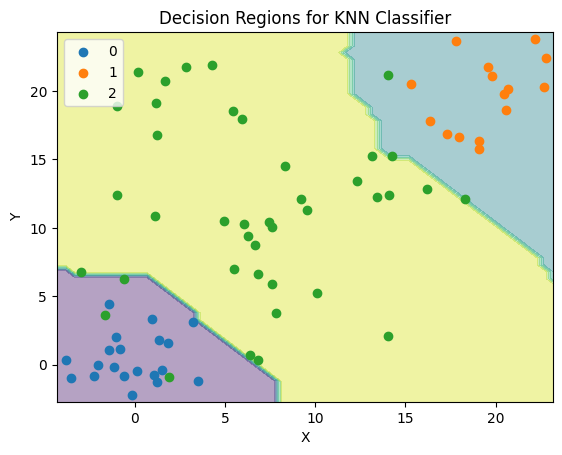

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import numpy as np

def knn_classification_visualization(data,k_range=[1,9]):
    #Unpack the data
    X = np.array([i[0:2] for i in data])
    y = np.array([i[2] for i in data])
    
    #Make sure the data is shuffled
    X, y = shuffle(X, y, random_state=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #find the best model based on accuracy
    knn = KNeighborsClassifier()
    best_score = 0
    best_k = None
    for k in k_range:
        knn.set_params(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
        accuracy = knn.score(X_test,y_test)
        if accuracy>best_score:
            best_score = accuracy
            best_k = k
            best_model = knn
    print(f"Best K: {best_k}, Best Accuracy: {best_score}")

    return best_model

def generate_meshgrid(X, h=0.5):
    """
    Generates a meshgrid for plotting decision regions.
    """
    x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
    y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
    return np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


def plot_decision_regions(X, y, knn_model, test_grid=None):
    """
    Plots decision regions for a KNN classifier.
    
    Args:
        X (np.ndarray): Training data
        y (np.ndarray): Training labels
        knn_model (KNeighborsClassifier): Trained KNN model
        test_grid (np.ndarray, optional): Meshgrid for evaluation (default: None)
    """

    # Generate meshgrid if not provided
    if test_grid is None:
        test_grid = generate_meshgrid(X)

    # Predict class labels for the meshgrid
    predicted_labels = knn_model.predict(np.stack((test_grid[0].reshape(-1),test_grid[1].reshape(-1))).T)
    predicted_labels = predicted_labels.reshape(test_grid[0].shape)

    # Plot decision region boundaries
    plt.contourf(test_grid[0], test_grid[1], predicted_labels, alpha=0.4)
    plt.xlim(test_grid[0].min(), test_grid[0].max())
    plt.ylim(test_grid[1].min(), test_grid[1].max())

    # Plot data points with different colors based on class labels
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1], label=label)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Regions for KNN Classifier')
    plt.legend()
    plt.show()
    

points_list = [list(l) for l in points_list]
model = knn_classification_visualization(points_list)

X = np.array([i[0:2] for i in points_list])
y = np.array([i[2] for i in points_list])

plot_decision_regions(X,y,model)

Best K: 1, Best Accuracy: 1.0


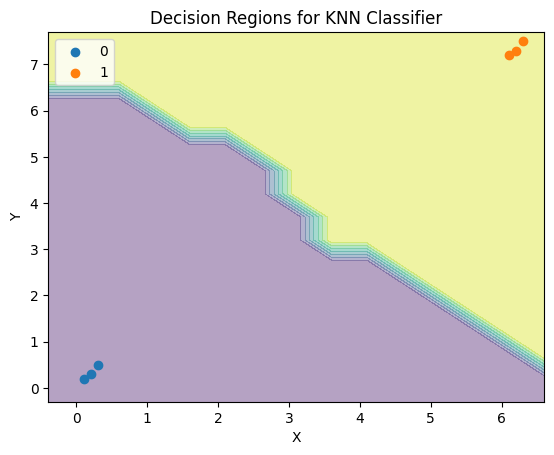

In [11]:
data = [[0.1,0.2,0],[0.3,0.5,0],[0.2,0.3,0],[6.1,7.2,1],[6.3,7.5,1],[6.2,7.3,1]]
knn_classification_visualization(data, k_range=[1,3])
X = np.array([i[0:2] for i in data])
y = np.array([i[2] for i in data])
plot_decision_regions(X,y,model)